<a href="https://colab.research.google.com/github/halil-durmaz/Machine-Learning/blob/master/_______TERM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red"> <font size="10px"> IMPORTING THE LIBRARIES </font>

In [ ]:
# Essentials
import pandas as pd
import numpy as np                                               


# Tools
from sklearn.model_selection import train_test_split             # To split the dataset into "Training set" and "Testing set"
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler


# Models - ML 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# Models - DL
from keras.models import Sequential                              # To define the NN model. We will create a "Sequential" model via this                   
from keras.layers import Dense                                   # To define the NN model. We will use "fully connected" Layers


# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc


# Visualization helpers
import matplotlib.pyplot as plt                                  # To create visualizations (Boxplots etc.)
import seaborn as sns                                            # To create visualizations
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="red"> <font size="10px"> IMPORTING THE DATASET & GLANCING </font>

- This .csv dataset has been created by combining the shared files in the related UCI repository

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/halil-durmaz/dataset/main/Dataset_Spambase.csv",
                      delimiter=";")           # Within the dataset, values are delimited by ";"

In [ ]:
# Dimensions of the dataset
dataset.shape

(4601, 58)

- 4601 rows
- 58 columns

In [ ]:
# Show the first 5 rows of the dataset, in order to have a general idea about the dataset
dataset.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# See the features
list(dataset)

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="red"> <font size="10px"> DATA PROCESSING </font>

<font color="orange"> <font size="5px"> Duplicate rows </color>
- Drop the Duplicate rows, if exists

- Since all of the feature values of an instance cannot easily be the same with another instance, we will assume that they are duplicate entries

- In order to reduce the redundant amount of row loss, duplicate rows will be dropped before dropping the unwanted columns 

In [ ]:
onezero_vector = dataset.duplicated()                                     # "True" will be returned for the entirely identical rows
print("Amount of duplicate instances ---> " + str(onezero_vector.sum()))  # If we sum those values (1's and 0's), we will obtain the amount of duplicate instances


dataset = dataset.drop_duplicates(keep="first")                           # First occurences will be kept; we will update the dataset

Amount of duplicate instances ---> 391


<br>
<br>
<br>
<br>

<font color="orange"> <font size="5px"> Feature selection </color>

- Remove the personalized variables, in order to have a General-purpose model at the end


In [ ]:
print(list(dataset))                         # Seeing them horizontally, allows me to practically copy-paste the column names

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

In [ ]:
dataset.drop(["word_freq_3d", 
              "word_freq_000",
              "word_freq_hp",
              "word_freq_hpl",
              "word_freq_george",
              "word_freq_650",
              "word_freq_telnet",
              "word_freq_857",
              "word_freq_415",
              "word_freq_85",
              "word_freq_1999",
              "word_freq_cs",
              "word_freq_lab",
              "word_freq_labs"
              ], 
              axis=1,                          # Column-wise/Row-wise
              inplace=True)                    # DataFrame is modified in place

<br>
<br>
<br>
<br>

<font color="orange"> <font size="5px"> Data types </color>

- Type of data contained in the variables should be checked

In [ ]:
dataset.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_money               float64
word_freq_data                float64
word_freq_technology          float64
word_freq_parts               float64
word_freq_pm                  float64
word_freq_di

In [ ]:
dataset[["Class"]] = dataset[["Class"]].astype('category')          # Class, "category" type'ında olmalı (??)

<br>
<br>
<br>
<br>

<font color="orange"> <font size="5px"> Misentry checks </color>

In [ ]:
#####################
# Check - Max values
#####################
maxvalues = dataset.iloc[:, 0:40].max(axis=0)                                    # Max values vector of the "frequency related columns"
maxvalues = maxvalues > 100                                                      # 0-1 vector. Forcing to return "False (0)" values since we will sum them to have a conclusion

print("Total amount of columns which has Maximum value bigger than 100 ---> " 
      + str(maxvalues.sum()))


#####################
# Check - Min values
#####################
minvalues = dataset.iloc[:, 0:40].min(axis=0)                                    # Min values vector of the "frequency related columns"
minvalues = minvalues < 0                                                        # 0-1 vector. Forcing to return "False (0)" values since we will sum them to have a conclusion

print("Total amount of columns which has Minimum value smaller than 0  ---> " 
      + str(minvalues.sum()))

Total amount of columns which has Maximum value bigger than 100 ---> 0
Total amount of columns which has Minimum value smaller than 0  ---> 0


- The columns which consist of frequency values have to have values only between 0 and 100. Therefore, we should check whether there is a problem or not

- There is no apparent misentry within the related columns

<br>
<br>
<br>
<br>

In [ ]:
##################
# Check - Classes
##################
dataset["Class"].unique()

[1, 0]
Categories (2, int64): [1, 0]

Since we will be working on a Binary Classification problem, as we expect, there is no class other than "1" and "0" within the dataset

<br>
<br>
<br>
<br>

<font color="orange"> <font size="5px"> Missing value check </color>

In [ ]:
dataset.isnull().sum().unique()

array([0])

- Since all of them are equal to 0, we conclude that there is no missing value within the dataset

<br>
<br>
<br>
<br>

<font color="orange"> <font size="5px"> Balance check </color>

In [ ]:
# Check the number of instances of Class "1" and Class "0"
dataset["Class"].value_counts()

0    2531
1    1679
Name: Class, dtype: int64

- !!!!!!!!!!! Eşit olmaları için, 0'ların gözlemlerinden 900 tane silmeli miyim? :) Inbalanced dataset üzerine araştırma yap

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="red"> <font size="10px"> EXPLORATORY DATA ANALYSIS </font>

<font color="orange"> <font size="5px"> Boxplots </color>
- Boxplot'larda class değişkenini gösterme. Onun type'ı `category` olduğu için zaten boxplot'ta kendiliğinden çıkmıyor olacak (???)

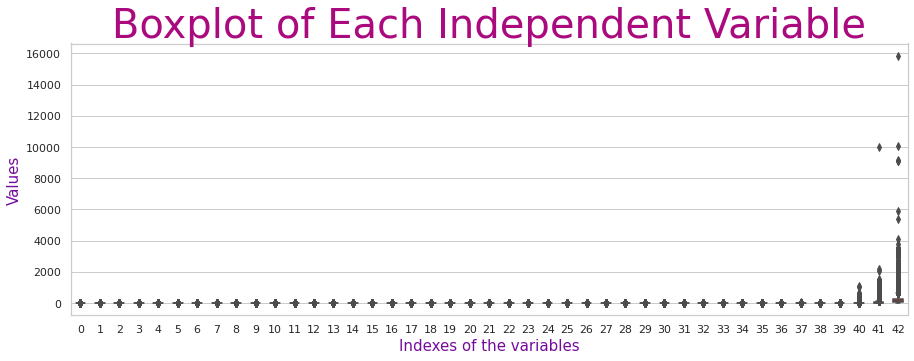

In [ ]:
######################################
# Boxplot - Each independent variable
######################################

# Style
sns.set(style="whitegrid")                               # Background of the plot


# Size of the figure
fig, ax = plt.subplots(figsize=(15,5))


# Title + Axis Labels
plt.title("Boxplot of Each Independent Variable",
          fontsize=40,
          color="#AA0A7E")

plt.xlabel("Indexes of the variables",
           fontsize=15,
           color="#750B9C")

plt.ylabel("Values",
           fontsize=15,
           color="#750B9C")


# Create the boxplots + Specift properties of the boxplots within the figure
sns.boxplot(data = dataset,       
            width = 0.5,        
            color = "red",
            orient = "v"
            )         


# Labels on the x-axis
labels_x = []

for i in range(0, len(dataset.columns)-1):     # -1 was not necessary, without that it works too, but wanted to eliminate the categorical variable from the amount
         i = str(i)
         labels_x.append(i)

plt.xticks(np.arange(43),       # How many spots you will have on the axis
           labels_x)            # What do you want to put on the axis


# Show
plt.show()

- Since the ranges of the last 3 independent variable varies a lot in comparison to the other independent variables, we will need to apply feature scaling. Because, Artificial Neural Networks are sensitive to the scales

<br>
<br>
<br>
<br>

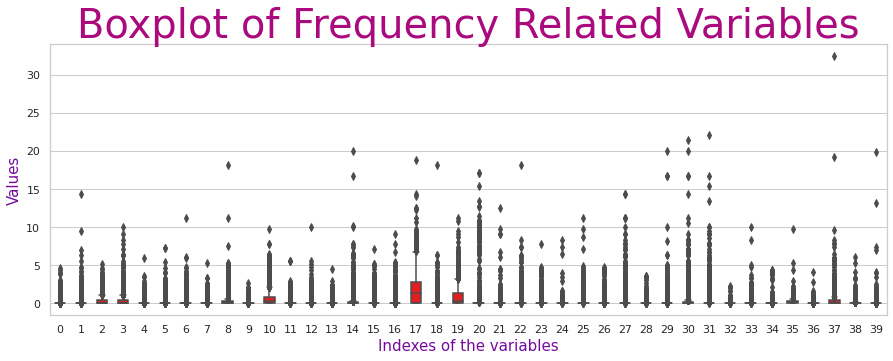

In [ ]:
###################################################################
# Boxplot - Word frequency & Character frequency related variables
###################################################################

# Style
sns.set(style="whitegrid")


# Size of the figure
fig, ax = plt.subplots(figsize=(15,5))


# Title + Axis Labels
plt.title("Boxplot of Frequency Related Variables",
          fontsize=40,
          color="#AA0A7E")

plt.xlabel("Indexes of the variables",
           fontsize=15,
           color="#750B9C")

plt.ylabel("Values",
           fontsize=15,
           color="#750B9C")


# Create the boxplots + Specify properties of the boxplots within the figure
sns.boxplot(data=dataset.iloc[:, 0:dataset.columns.get_loc("capital_run_length_average")],   
            width=0.5,        
            color="red",
            orient="v"
            )         


# Labels on the x-axis
labels_x = []

for i in range(0, dataset.columns.get_loc("capital_run_length_average")):  # Index of the last column + 1(Because range() excludes the last value)
         i = str(i)
         labels_x.append(i)

plt.xticks(np.arange(40),       # How many spots you will have on the axis
           labels_x)            # What do you want to put on the axis


# Show
plt.show()

- Lots of outliers

<br>
<br>
<br>
<br>

<font color="orange"> <font size="5px"> Correlation analysis </color>

- Categorical variables should be excluded from the correlation analysis. However, since we set "Class" variable as categorical, it will not be shown already

In [ ]:
##############################
# Correlation matrix creation
##############################

correlation_matrix = dataset.corr(method="spearman")    # Spearman is used, since the amount of outliers is so high

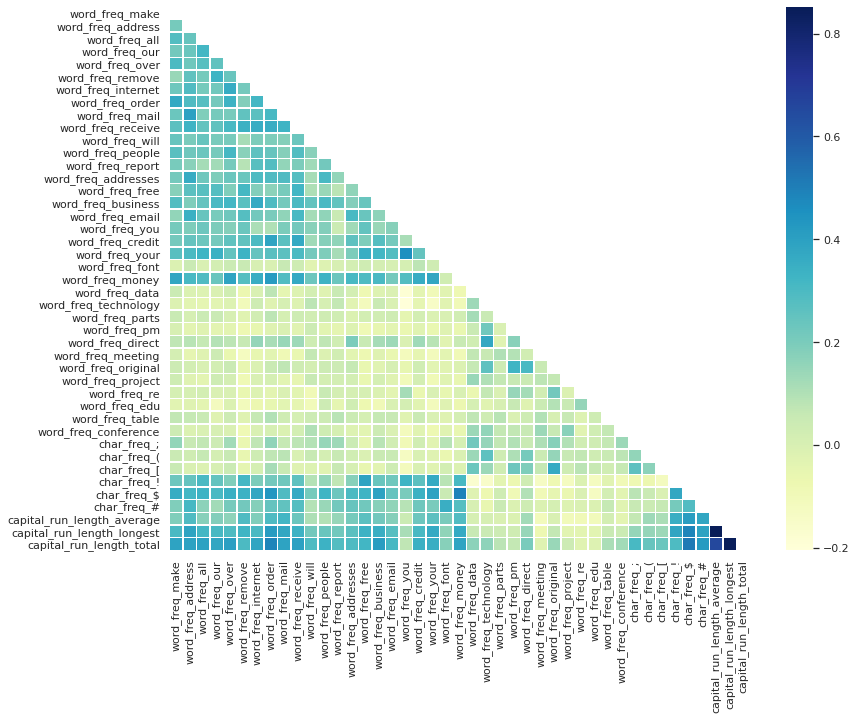

In [ ]:
###################
# Heatmap creation
###################

f = plt.figure(figsize=(13, 10))

# creating mask
mask = np.triu(np.ones_like(correlation_matrix))
  
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(correlation_matrix, 
                       cmap="YlGnBu", 
                       annot=False,                     # Do not show the "numbers"
                       mask=mask,
                       linewidths=.5)

In [ ]:
# List the highest correlations
correlation_matrix = correlation_matrix.replace(1.0, 
                                                np.NaN)                 # Get rid of the 1.0's since it does not give any insight

correlation_matrix.stack().sort_values(ascending = False).iloc[:25]     # See the highest positively correlated variables

capital_run_length_longest  capital_run_length_average    0.852373
capital_run_length_average  capital_run_length_longest    0.852373
capital_run_length_total    capital_run_length_longest    0.844915
capital_run_length_longest  capital_run_length_total      0.844915
capital_run_length_average  capital_run_length_total      0.655681
capital_run_length_total    capital_run_length_average    0.655681
char_freq_$                 capital_run_length_total      0.514425
capital_run_length_total    char_freq_$                   0.514425
word_freq_money             char_freq_$                   0.490191
char_freq_$                 word_freq_money               0.490191
word_freq_order             capital_run_length_total      0.487282
capital_run_length_total    word_freq_order               0.487282
char_freq_$                 capital_run_length_longest    0.486388
capital_run_length_longest  char_freq_$                   0.486388
word_freq_your              word_freq_you                 0.45

In [ ]:
# Removing the highly correlated variable
dataset.drop(['capital_run_length_longest', 
              ], 
              axis=1,                             # Column-wise/Row-wise
              inplace=True)                       # DataFrame is modified in place

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="red"> <font size="10px"> SPLITTING THE DATASET </font>

In [ ]:
# Separate "Input columns" and "Target column" into different arrays
X = dataset.iloc[:, 0:42]       
y = dataset.iloc[:, 42]

- Önce Splitting, sonra Scaling yapılmalıdır
- İlk uygulanacak model DT. DT, scaling gerektirmez; hem scale etmemiz durumunda gerçek sayıları kaybettiğimiz için ağacımız yorumlanabilirliğini kaybeder (???)

In [ ]:
# Training/Validation/Testing split (60/20/20) - It will be required to use the function 2 times
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,   # 20% of the rows will generate our "Testing Set"
                                                    stratify=y,       # Stratify based on "y"
                                                    random_state=11)  # Set seed to a specific number to get the same results from every run   

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.25,     # 20% of the Training set rows will generate our "Validation Set"
                                                  stratify=y_train, 
                                                  random_state=11)     

In [ ]:
# Check the number of instances of Class "1" and Class "0"
print("Training set")
print(y_train.value_counts())

print()

print("Validation set")
print(y_val.value_counts())

print()

print("Testing set")
print(y_test.value_counts())

Training set
0    1519
1    1007
Name: Class, dtype: int64

Validation set
0    506
1    336
Name: Class, dtype: int64

Testing set
0    506
1    336
Name: Class, dtype: int64


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="red"> <font size="10px"> Model #1: DECISION TREE </font>

<font color="orange"> <font size="5px"> Full model </color>
- Alpha=0
- Of course, not will be the optimal model



In [ ]:
# Create the model
model_decisiontree = DecisionTreeClassifier(criterion="gini",
                                            random_state=11)


# Train the model
model_decisiontree.fit(X_train,
                       y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

<br>
<br>
<br>
<br>

<font color="orange"> <font size="5px"> Cost Complexity Pruning </color>
- Ağaç için müsait olan her Alpha değeri için, bir Pruned Tree yaratacağız. Amacımız, Alpha için optimal değeri bulmak
- Max değeri hariç bırakacağız. Çünkü, o değer ile pruning yapılırsa, tam budama yapar ve sadece Root node kalır

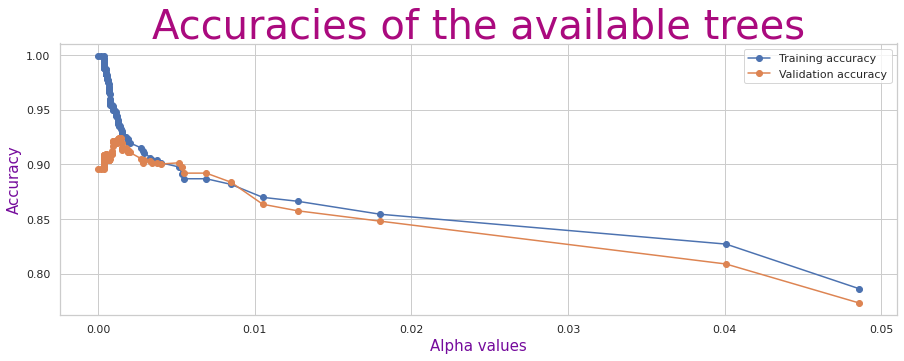

In [ ]:
ccp_path = model_decisiontree.cost_complexity_pruning_path(X_train,       # ccp_alphas (available values) & impurities will be returned
                                                           y_train)

ccp_alphas = ccp_path.ccp_alphas[:-1]                                     # retrieve the Alpha values excluding the maximum value



# Create Decision Trees for each Alpha value
models_decisiontree = []

for alpha in ccp_alphas:
          model_decisiontree = DecisionTreeClassifier(criterion="gini",       # Create the model for that specific Alpha value
                                                      ccp_alpha=alpha,
                                                      random_state=11)
          model_decisiontree.fit(X_train,                                     # Train the model
                                 y_train)
         
          models_decisiontree.append(model_decisiontree)                      # Add the model to the List



# Gather the accuracy values
training_accuracies = []
for model_decisiontree in models_decisiontree:
          training_accuracies.append(model_decisiontree.score(X_train, y_train))

validation_accuracies = []
for model_decisiontree in models_decisiontree:
          validation_accuracies.append(model_decisiontree.score(X_val, y_val))



# Visualize to evaluate
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(ccp_alphas,
         training_accuracies,
         label="Training accuracy",
         marker="o")

plt.plot(ccp_alphas,
         validation_accuracies,
         label="Validation accuracy",
         marker="o")


# Title + Axis Labels
plt.title("Accuracies of the available trees",
          fontsize=40,
          color="#AA0A7E")

plt.xlabel("Alpha values",
           fontsize=15,
           color="#750B9C")

plt.ylabel("Accuracy",
           fontsize=15,
           color="#750B9C")

plt.legend()

plt.show()

- En sondan 8. olan ideal. Çünkü, ağaçları çizdirip de klasörde toplayıp topluca bakınca (görünüm seçeneği: çok büyük simgeler), 9.'da ağaç birden aşırı kompleks hale geliyor. O yüzden, 8. sonrasında accuracy'nin biraz daha artmış olmasının değeri kalmaz bence

In [ ]:
optimal_validationaccuracy = validation_accuracies[-8]     # Grafiğe bakarak, en sondan başlayarak sayıp da hem performansı yüksek hem açıklanabilirliği yükseği buldum

search = validation_accuracies.index(optimal_validationaccuracy)

ccp_alphas_list = list(ccp_alphas)          # Since it is a NumpyArray, create a List object from that
ccp_alphas_list[search]                     # Return the Alpha value !

0.005463595377294274

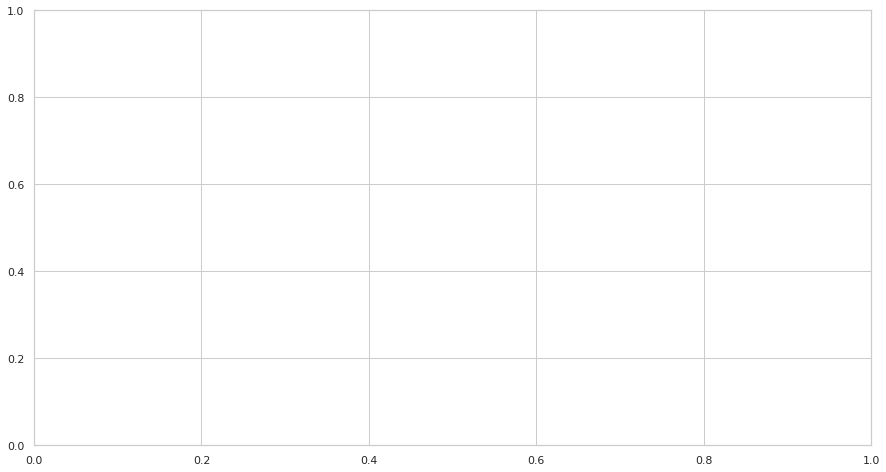

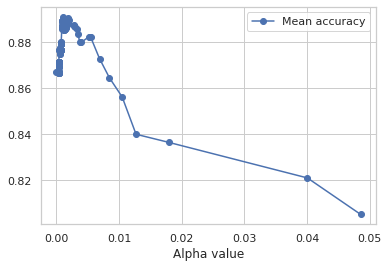

In [ ]:
# Create Decision Trees for each Alpha value - Cross Validation ile optimal Alpha değerini bulalım
alpha_outputs = []

for alpha in ccp_alphas:
          model_decisiontree = DecisionTreeClassifier(criterion="gini",       # Create the model for that specific Alpha value
                                                      ccp_alpha=alpha,
                                                      random_state=11)
          accuracies = cross_val_score(model_decisiontree,
                                       X_train,
                                       y_train,
                                       cv = 10)
          alpha_outputs.append([alpha, np.mean(accuracies)])


# Plot to evaluate
alpha_outputs = pd.DataFrame(alpha_outputs,
                             columns=["Alpha value", "Mean accuracy"])

fig, ax = plt.subplots(figsize=(15,8))

alpha_outputs.plot(x="Alpha value",
                   y="Mean accuracy",
                   marker="o"
                   )


- İdeal alpha değerini bulduk işte şimdi en doğru şekilde

In [ ]:
#################################
# Train the decided model version
##################################
optimalmodel_decisiontree = DecisionTreeClassifier(criterion = "gini",                      
                                                   ccp_alpha = ccp_alphas_list[search],     # Create the model for that specific Alpha value
                                                   random_state = 11)

optimalmodel_decisiontree.fit(X_train,
                              y_train)

DecisionTreeClassifier(ccp_alpha=0.005463595377294274, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=11, splitter='best')

In [ ]:
###############################
# Plot the Final Decision Tree
###############################

# DOT data
dot_data = export_graphviz(optimalmodel_decisiontree, 
                           out_file = None, 
                           feature_names = dataset.iloc[:, 0:42].columns,    # To show the "column names" in the plot; otherwise, indices will be shown
                           class_names = ["Acceptable", "Spam"],             # Grafikte class isimleri yerine y[0] gibi şeyler gözükür yoksa
                           filled = True)                                    # Renklendirmeler yapılmaz yoksa

# Draw graph
graph = graphviz.Source(dot_data, 
                        format="png")


# Save as a file
graph.render("/tmp/DT__-8")

'/tmp/DT__-8.png'

- `plot_tree()` ile çizdirmeye çalışınca, oklar görünmedi. O yüzden, başka bir yol aradım (`export_graphviz`) ve işe yaradı
- `class_names = True` yaparsan, görselde y[0] şeklinde gösteriyor

<br>
<br>

- In each node, the samples inside of it are separated by classes in the `value` parameter. The class which has the highest number of samples will determine `class` of the node
- The value of the `class` parameter will determine the color of the node. 
- DT görselinde, `gini` değeri yükseldikçe renk açıklaşır. Renk beyaz gibiyse, içindeki sample'lar kategori bazında sayıca dengede demektir

<br>
<br>

- `char_freq_!` is the most important feature, in terms of Spam detection. The importance level of the features are decreasing when going down through the tree

<br>
<br>

- The feature inside of the root-node is `char_freq_!`. It is reasonable, since a scammer probably would try to attract the attention of the receiver by using "!" within the e-mail

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="red"> <font size="10px"> Model #2: ARTIFICIAL NEURAL NETWORK </font>

# <font color="orange"> Feature scaling (Min-Max) </font>

In [ ]:
featurescaler = MinMaxScaler()
X_train_scaled = featurescaler.fit_transform(X_train)     # PandasDataframe'di, NumpyArray'a dönüştü şimdi. İlerideki bazı operasyonlar için önemli bu bilgi


# Scale validation and testing data (Training set ile öğrenilmiş parametreler üzerinden, sadece transform yapıyoruz)
X_val_scaled = featurescaler.transform(X_val)
X_test_scaled = featurescaler.transform(X_test)

<br>
<br>
<br>
<br>

# <font color="orange"> Designing the model </font>

In [ ]:
optimalmodel_ann = Sequential()                         # Create a Sequential model


# Add the layers
optimalmodel_ann.add(Dense(2,                           # Number of neurons within the 1st hidden layer
                           input_dim=42,                # The number of input features
                           activation="relu"))          # Activation function of the layer will be ReLU function

optimalmodel_ann.add(Dense(1,                           # Number of neurons within the Output layer
                           activation="sigmoid"))       # Activation function of the Output layer. For a "Binary classification" task, "sigmoid" is required



# Compile
optimalmodel_ann.compile(loss="binary_crossentropy",       # Loss function (binary_crossentropy, hinge, squared_hinge)
                         optimizer="adam",                 # for an auto-adaptable Learning Rate
                         metrics=["accuracy"])             # To report the Training accuracy, in the end

<br>
<br>
<br>
<br>

# <font color="orange"> Training the model </font>

- Modeli verisetine uyduralım (Modeli eğitelim)
- Network'ü eğitmek = Optimum w değerlerini bulmak
- Bu konfigürasyonların değerleri, deneysel olarak seçilebilirler
- CPU veya GPU üzerinde, hesaplamalar bu kısımda gerçekleşecek

In [ ]:
history = optimalmodel_ann.fit(X_train_scaled, y_train,
                               validation_data=(X_val_scaled, y_val),
                               epochs=200,                                   # When the whole training set is done, 1 epoch is done
                               batch_size=25,
                               verbose=1)                                    # "0" = Mask computation, "1" = Watch computation

Epoch 1/200
102/102 [==============================] - 16s 7ms/step - loss: 0.6895 - accuracy: 0.5855 - val_loss: 0.6735 - val_accuracy: 0.6948
Epoch 2/200
102/102 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.7219 - val_loss: 0.6400 - val_accuracy: 0.7791
Epoch 3/200
102/102 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.7969 - val_loss: 0.6039 - val_accuracy: 0.7981
Epoch 4/200
102/102 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.8101 - val_loss: 0.5673 - val_accuracy: 0.8171
Epoch 5/200
102/102 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.8184 - val_loss: 0.5327 - val_accuracy: 0.8219
Epoch 6/200
102/102 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.8293 - val_loss: 0.5015 - val_accuracy: 0.8337
Epoch 7/200
102/102 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.8392 - val_loss: 0.4740 - val_accuracy: 0.848

<br>
<br>
<br>
<br>

# <font color="orange"> Overfitting & Underfitting analysis by plotting </font>

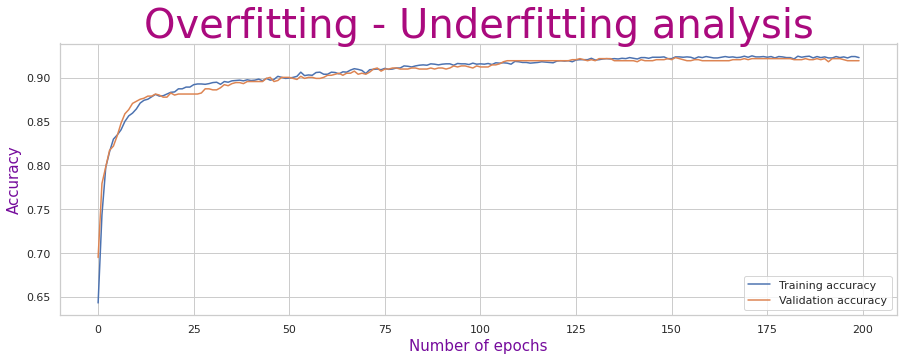

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))


plt.plot(history.history["accuracy"],
         label="Training accuracy")

plt.plot(history.history["val_accuracy"],
         label="Validation accuracy")


# Title + Axis Labels
plt.title("Overfitting - Underfitting analysis",
          fontsize=40,
          color="#AA0A7E")

plt.xlabel("Number of epochs",
           fontsize=15,
           color="#750B9C")

plt.ylabel("Accuracy",
           fontsize=15,
           color="#750B9C")


plt.legend()

plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="red"> <font size="10px"> EVALUATING THE MODELS </font>

- Compare the models by using Validation Set

<br>
<br>
<br>
<br>

# <font color="orange"> Optimizing the models by threshold tuning </font>

- The activation function of our single output perceptron is "sigmoid function". Therefore, the output values will be in the range of 0-1; by rounding these values to the closest boundry (0 or 1), we will obtain our predictions

<br>

- Sensitivity = True Positive Rate <br>
  Specificity = True Negative Rate

<br>

- Specificity --> 0.999'a yakın bi şey olmalı <br>
  Sensitivity --> Maximize edilmeli
  

In [ ]:
###############################
# Decision Tree - Calculations
###############################

specificities_decisiontree = []
sensitivities_decisiontree = []

for threshold_decisiontree in range(50, 101):
  threshold_decisiontree = threshold_decisiontree / 100
  
  # Obtain "prediction values" for the Validation Set   
  predictions_decisiontree = optimalmodel_decisiontree.predict_proba(X_val)[:, 1] >= threshold_decisiontree 

  # Create the Confusion Matrix
  confusionmatrix_decisiontree = confusion_matrix(y_val,                                                         
                                                  predictions_decisiontree)
                      
  # Extract the 4 elements of the confusion matrix
  TP_decisiontree = confusionmatrix_decisiontree[1, 1]
  TN_decisiontree = confusionmatrix_decisiontree[0, 0]
  FP_decisiontree = confusionmatrix_decisiontree[0, 1]
  FN_decisiontree = confusionmatrix_decisiontree[1, 0]

  # Calculate the metrics and append
  specificity_decisiontree = round(TN_decisiontree/(TN_decisiontree + FP_decisiontree), 2)
  specificities_decisiontree.append(specificity_decisiontree)
  sensitivity_decisiontree = round(TP_decisiontree/(TP_decisiontree + FN_decisiontree), 2)
  sensitivities_decisiontree.append(sensitivity_decisiontree)

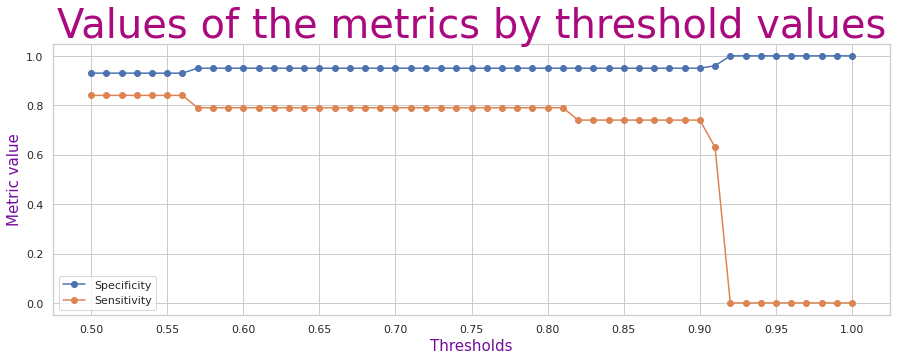

In [ ]:
#################################
# Decision Tree - Threshold Plot
#################################

fig, ax = plt.subplots(figsize=(15, 5))

xaxis_values = [threshold/100 for threshold in range(50,101)]

plt.plot(xaxis_values,
         specificities_decisiontree,
         label="Specificity",
         marker="o")

plt.plot(xaxis_values,
         sensitivities_decisiontree,
         label="Sensitivity",
         marker="o")


# Title + Axis Labels
plt.title("Values of the metrics by threshold values",
          fontsize=40,
          color="#AA0A7E")

plt.xlabel("Thresholds",
           fontsize=15,
           color="#750B9C")

plt.ylabel("Metric value",
           fontsize=15,
           color="#750B9C")

plt.xticks(np.arange(min(xaxis_values), 
                     max(xaxis_values) + 0.05, 
                     0.05))

plt.legend()

plt.show()

In [ ]:
# 0.81 - Metric values
print("Specificity for 0.81 threshold ----> " +
      str(specificities_decisiontree[xaxis_values.index(0.81)])
     )

print("Sensitivity for 0.81 threshold ----> " +
      str(sensitivities_decisiontree[xaxis_values.index(0.81)])
     )

Specificity for 0.81 threshold ----> 0.95
Sensitivity for 0.81 threshold ----> 0.79


In [ ]:
###########################################
# Artificial Neural Network - Calculations
###########################################

specificities_ann = []
sensitivities_ann = []

for threshold_ann in range(50, 101):
  threshold_ann = threshold_ann / 100
  
  # Obtain "prediction values" for the Validation Set   
  predictions_ann = (optimalmodel_ann.predict(X_val_scaled) >= threshold_ann).astype("int32") 

  # Create the Confusion Matrix
  confusionmatrix_ann = confusion_matrix(y_val,                                                         
                                         predictions_ann)
                      
  # Extract the 4 elements of the confusion matrix
  TP_ann = confusionmatrix_ann[1, 1]
  TN_ann = confusionmatrix_ann[0, 0]
  FP_ann = confusionmatrix_ann[0, 1]
  FN_ann = confusionmatrix_ann[1, 0]

  # Calculate the metrics and append
  specificity_ann = round(TN_ann/(TN_ann + FP_ann), 2)
  specificities_ann.append(specificity_ann)
  
  sensitivity_ann = round(TP_ann/(TP_ann + FN_ann), 2)
  sensitivities_ann.append(sensitivity_ann)

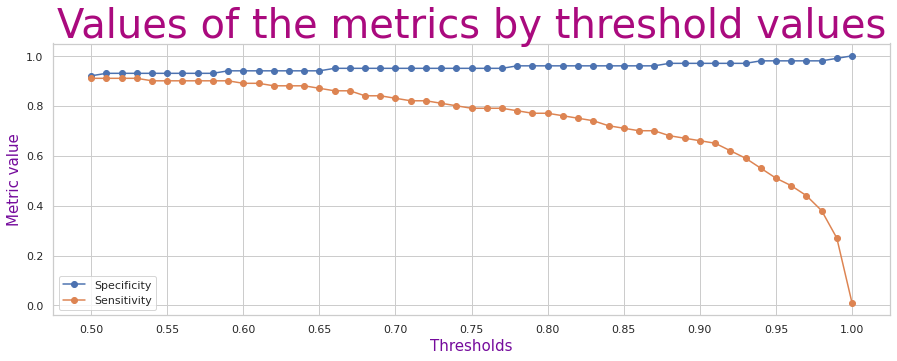

In [ ]:
#############################################
# Artificial Neural Network - Threshold Plot
#############################################

fig, ax = plt.subplots(figsize=(15, 5))

xaxis_values = [threshold/100 for threshold in range(50,101)]

plt.plot(xaxis_values,
         specificities_ann,
         label="Specificity",
         marker="o")

plt.plot(xaxis_values,
         sensitivities_ann,
         label="Sensitivity",
         marker="o")


# Title + Axis Labels
plt.title("Values of the metrics by threshold values",
          fontsize=40,
          color="#AA0A7E")

plt.xlabel("Thresholds",
           fontsize=15,
           color="#750B9C")

plt.ylabel("Metric value",
           fontsize=15,
           color="#750B9C")

plt.xticks(np.arange(min(xaxis_values), 
                     max(xaxis_values) + 0.05, 
                     0.05))

plt.legend()

plt.show()

In [ ]:
# Metric values for threshold values

tvalue = 0.88

print("Specificity for " + str(tvalue) + " threshold ----> " + str(specificities_ann[xaxis_values.index(tvalue)]))

print("Sensitivity for " + str(tvalue) + " threshold ----> " + str(sensitivities_ann[xaxis_values.index(tvalue)]))

Specificity for 0.88 threshold ----> 0.97
Sensitivity for 0.88 threshold ----> 0.68


<br>
<br>
<br>
<br>

# <font color="orange"> Confusion Matrix plotting for final models </font>

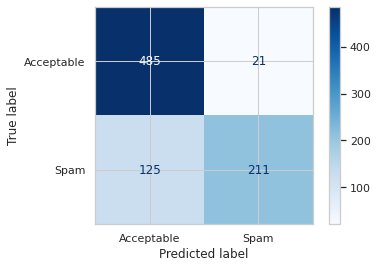

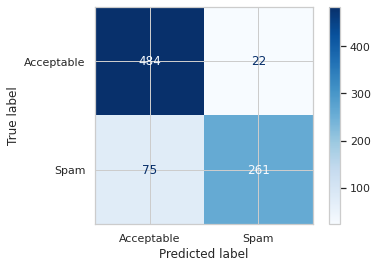

In [ ]:
################
# Decision Tree
################

# Obtain "prediction values" for the Validation Set   
predictions_decisiontree = optimalmodel_decisiontree.predict_proba(X_val)[:, 1] >= 0.91

# Create the Confusion Matrix
confusionmatrix_decisiontree = confusion_matrix(y_val,                                                         
                                                predictions_decisiontree)

confusionmatrix_decisiontree_plot = ConfusionMatrixDisplay(confusionmatrix_decisiontree, 
                                                           display_labels = ["Acceptable", "Spam"],
                                                           )
confusionmatrix_decisiontree_plot.plot(cmap="Blues",                                                   # Only 1 color will be used to create a clear plot
                                       values_format='')                                               # Scientific notation will not be used to display the numbers


############################
# Artificial Neural Network
############################

# Obtain "prediction values" for the Validation Set   
predictions_ann = (optimalmodel_ann.predict(X_val_scaled) >= 0.78).astype("int32") 

# Create the Confusion Matrix
confusionmatrix_ann = confusion_matrix(y_val,                                                         
                                      predictions_ann)

confusionmatrix_ann_plot = ConfusionMatrixDisplay(confusionmatrix_ann, 
                                                  display_labels = ["Acceptable", "Spam"],
                                                  )
confusionmatrix_ann_plot.plot(cmap="Blues",                                                            # Only 1 color will be used to create a clear plot
                              values_format='')                                                        # Scientific notation will not be used to display the numbers

- Number of Acceptable mails = 506......450'si doğru sınıflandırıldı
- Number of Spam mails = 336...............300'ü doğru sınıflandırıldı

- We will try to optimize the Confusion Matrix

<br>
<br>
<br>
<br>

# <font color="orange"> Accuracy </font>

In [ ]:
############################
# Null accuracy calculation
############################

a = y_val.value_counts()                                 # Number of "0" = 506, Number of "1" = 336


# Percentage calculation
percentage_acceptable = round(a[0] / (a[0] + a[1]), 2)
percentage_spam       = round(a[1] / (a[0] + a[1]), 2)


# Null accuracy calculation
print("Null accuracy ---> " + str(max(percentage_acceptable, percentage_spam)))

Null accuracy ---> 0.6


In [ ]:
accuracy_decisiontree = accuracy_score(y_val, 
                                       predictions_decisiontree)

accuracy_ann          = accuracy_score(y_val,
                                       predictions_ann)


print("Validation Accuracy of Decision Tree model             ---> " + str(round(accuracy_decisiontree, 2)))
print("Validation Accuracy of Artificial Neural Network model ---> " + str(round(accuracy_ann, 2)))

Validation Accuracy of Decision Tree model             ---> 0.83
Validation Accuracy of Artificial Neural Network model ---> 0.88


- Both of the models have a validation accuracy value much higher than the Null Accuracy value. Therefore, models are valid in terms of Accuracy metric

<br>
<br>
<br>
<br>

# <font color="orange"> ROC curve & AUC </font>

- Modellerin, ROC curve'ünü 1 grafikte gösteren; AUC değerlerini de gösteren bir kod yazalım

In [ ]:
# Calculations for "Decision Tree"
probabilities_val_decisiontree = optimalmodel_decisiontree.predict_proba(X_val)[:, 1]

falsepositiverate_decisiontree, truepositiverate_decisiontree, thresholds = roc_curve(y_val, 
                                                                                      probabilities_val_decisiontree)

rocauc_decisiontree = auc(falsepositiverate_decisiontree, 
                          truepositiverate_decisiontree)


# Calculations for "ANN"
probabilities_val_ann = optimalmodel_ann.predict_proba(X_val)[:, 1]

falsepositiverate_ann, truepositiverate_ann, thresholds = roc_curve(y_val, 
                                                                    probabilities_val_ann)

rocauc_ann = auc(falsepositiverate_ann, 
                 truepositiverate_ann)

<br>
<br>

In [ ]:
# Modellere spesifik katmanlar
plt.plot(falsepositiverate_decisiontree, 
         truepositiverate_decisiontree, 
         color="red", 
         label="Decision Tree - AUC = %0.2f" % rocauc_decisiontree)

plt.plot(falsepositiverate_ann, 
         truepositiverate_ann, 
         color="blue", 
         label="ANN - AUC = %0.2f" % rocauc_ann)


# Axises settings
plt.plot([0, 1], 
         [0, 1], 
         linestyle='--')


# Other settings
plt.legend(loc='lower right')
plt.axis('tight')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.figure(figsize=(6,6))
plt.show()


- Sol üst köşeye en çok yakınsayan model (en iyi model), grafikten net olarak anlaşılamamaktadır. Ancak, AUC değerlerine baktığımızda, 1'e en yakın modelin (en iyi model) `HANGİ MODELSE YAZ` olduğunu görüyoruz

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="red"> <font size="10px"> SEÇTİĞİN ALGORİTMA ne kadar iyi çalışıyor </font>

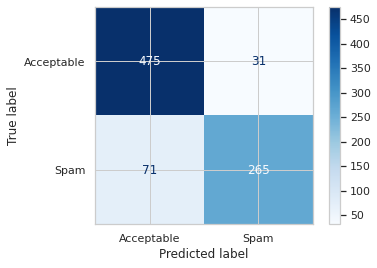

In [ ]:
############################
# Artificial Neural Network
############################

# Obtain "prediction values" for the Testing set   
predictions_ann = (optimalmodel_ann.predict(X_test_scaled) >= 0.78).astype("int32") 

# Create the Confusion Matrix
confusionmatrix_ann = confusion_matrix(y_test,                                                         
                                       predictions_ann)

confusionmatrix_ann_plot = ConfusionMatrixDisplay(confusionmatrix_ann, 
                                                  display_labels = ["Acceptable", "Spam"],
                                                  )
confusionmatrix_ann_plot.plot(cmap="Blues",                                                            # Only 1 color will be used to create a clear plot
                              values_format='')                                                        # Scientific notation will not be used to display the numbers